# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_BTC = 1.2
my_ETH = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
data_BTC= requests.get(btc_url).json()
btc_cad_price = data_BTC['data']['1']['quotes']['CAD']['price']

# # Fetch current ETH price
# # YOUR CODE HERE!
data_ETH = requests.get(eth_url).json()
eth_cad_price = data_ETH['data']['1027']['quotes']['CAD']['price']

# # Compute current value of my crpto
# # YOUR CODE HERE!
my_btc_value=(btc_cad_price*my_BTC)
my_eth_value=(eth_cad_price*my_ETH)

# # Print current crypto wallet balance
print(f"The current value of your {my_BTC} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_ETH} ETH is ${my_eth_value:0.2f}")




The current value of your 1.2 BTC is $83604.83
The current value of your 5.3 ETH is $11550.98


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
# YOUR CODE HERE!
my_SPY=50
my_AGG=200

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("Alpaca_Key_ID")
alpaca_secret_key = os.getenv("Alpaca_Secret_Key")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url="https://paper-api.alpaca.markets",
    api_version="v2")


In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-03-19", tz="America/New_York").isoformat()
type(today)

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
SPY_AGG_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!
SPY_AGG_portfolio

AGG                                     SPY  \
                            open    high     low  close   volume    open   
time                                                                       
2021-03-19 00:00:00-04:00  113.4  113.54  113.33  113.5  4674852  389.88   

                                                             
                              high     low  close    volume  
time                                                         
2021-03-19 00:00:00-04:00  391.569  387.15  389.5  93819590

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price= SPY_AGG_portfolio['AGG']['close'][0]
spy_close_price= SPY_AGG_portfolio['SPY']['close'][0]

# # Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.5
Current SPY closing price: $389.5


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value= agg_close_price*my_AGG
my_spy_value= spy_close_price*my_SPY
# Print current value of share
print(f"The current value of your {my_SPY} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_AGG} AGG shares is ${my_agg_value:0.2f}")





The current value of your 50 SPY shares is $19475.00
The current value of your 200 AGG shares is $22700.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income=12000
# Create savings DataFrame
# YOUR CODE HERE!
shares = my_agg_value + my_spy_value
crypto = my_btc_value + my_eth_value

savings= {'amount':[crypto,shares]}
df_savings= pd.DataFrame(savings,columns=['amount'], index=['crypto','shares'])


# Display savings DataFrame
display(df_savings)


,amount
crypto,95155.807545
shares,42175.000000


<AxesSubplot:title={'center':'Savings'}, ylabel='amount'>

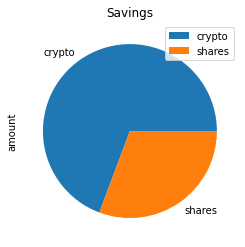

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Savings")


In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings= crypto+shares
total_savings


# Validate saving health
# YOUR CODE HERE!

if total_savings>emergency_fund: 
    print("Congratulations, You Have Good Savings")
elif total_savings==emergency_fund:
     print("You Could Save More")
else:
    print(f"YOU NEED TO SAVE $",emergency_fund - total_savings, "MORE")

Congratulations, You Have Good Savings


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
time_frame= "1Y"
tickers = ["SPY","AGG"]
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2017-01-11 00:00:00-05:00  108.53  108.93  108.420  108.585  3714128.0   
2017-01-12 00:00:00-05:00  108.78  108.90  108.610  108.620  2876232.0   
2017-01-13 00:00:00-05:00  108.50  108.55  108.261  108.440  3083926.0   
2017-01-17 00:00:00-05:00  108.81  108.87  108.650  108.790  3253649.0   
2017-01-18 00:00:00-05:00  108.60  108.67  108.235  108.315  2873994.0   

                              SPY                                       
                             open    high      low   close      volume  
time                                                                    
2017-01-11 00:00:00-05:00     NaN     NaN      NaN     NaN         NaN  
2017-01-12 00:00:00-05:00  226.50  226.75  224.955  226.57  59431700.0  
2017-01-13 00:00:00-05:00  226.73  227.40  226.690  227.03  42877069.0  
2017-01-17 00:00:00-05:00  226.31  226.78  225.800  226.29  44347527.0  
2017-01-18 00:00:00-05:00  226.54  226.80  225.900  226.74  42486413.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30year.portfolio_data.head()

AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2017-01-11 00:00:00-05:00  108.53  108.93  108.420  108.585  3714128.0   
2017-01-12 00:00:00-05:00  108.78  108.90  108.610  108.620  2876232.0   
2017-01-13 00:00:00-05:00  108.50  108.55  108.261  108.440  3083926.0   
2017-01-17 00:00:00-05:00  108.81  108.87  108.650  108.790  3253649.0   
2017-01-18 00:00:00-05:00  108.60  108.67  108.235  108.315  2873994.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-01-11 00:00:00-05:00          NaN     NaN     NaN      NaN     NaN   
2017-01-12 00:00:00-05:00     0.000322  226.50  226.75  224.955  226.57   
2017-01-13 00:00:00-05:00    -0.001657  226.73  227.40  226.690  227.03   
2017-01-17 00:00:00-05:00     0.003228  226.31  226.78  225.800  226.29   
2017-01-18 00:00:00-05:00    -0.004366  226.54  226.80  225.900  226.74   

                                                    
                               volume daily_return  
time                                                
2017-01-11 00:00:00-05:00         NaN          NaN  
2017-01-12 00:00:00-05:00  59431700.0          NaN  
2017-01-13 00:00:00-05:00  42877069.0     0.002030  
2017-01-17 00:00:00-05:00  44347527.0    -0.003259  
2017-01-18 00:00:00-05:00  42486413.0     0.001989

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992627,1.005023,0.994436,1.008872,0.996597,1.007530,0.994380,1.000013,1.003831,1.000098,...,0.990751,1.010039,1.000921,0.999739,1.001882,0.990357,0.989663,0.991697,0.999554,1.007341
2,0.996210,0.995094,0.995468,1.008605,1.001055,1.002897,0.994788,0.992251,0.999475,1.004109,...,0.991002,1.005933,1.001205,1.006924,1.008698,0.996272,0.989506,0.980518,1.012262,1.005438
3,0.998675,0.996646,1.001826,1.011329,0.997765,1.002627,1.001353,0.999723,1.001214,1.001724,...,0.995794,1.009718,0.989652,1.012165,1.004015,1.004157,0.985178,0.973642,1.004095,1.004453
4,0.995785,0.998160,1.008109,1.017376,0.995947,0.994758,1.001325,0.988576,1.000225,0.989877,...,1.001066,1.014710,0.986782,1.011190,1.005023,1.005482,0.989480,0.966961,0.995622,1.001769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.943217,3.578923,4.814709,6.457442,6.743287,15.126222,6.733363,4.075274,7.892593,7.464715,...,9.022945,7.572317,15.870577,6.168152,5.422896,8.330031,7.083879,8.796732,7.471793,10.703485
7557,11.965202,3.609444,4.805197,6.477199,6.780616,15.124501,6.819140,4.068039,7.899951,7.455922,...,9.092418,7.586877,15.943516,6.178768,5.414790,8.330432,7.063535,8.817176,7.487643,10.649237
7558,11.975670,3.625091,4.781098,6.486837,6.840400,15.243029,6.766194,4.057008,7.837141,7.421307,...,9.142639,7.633174,15.954952,6.167554,5.438905,8.258819,7.061621,8.811275,7.561078,10.608602
7559,11.980596,3.638756,4.755887,6.541061,6.812436,15.170927,6.682938,4.021638,7.836578,7.398826,...,9.176638,7.638167,16.024334,6.159090,5.455922,8.192248,7.005266,8.905224,7.578832,10.568781


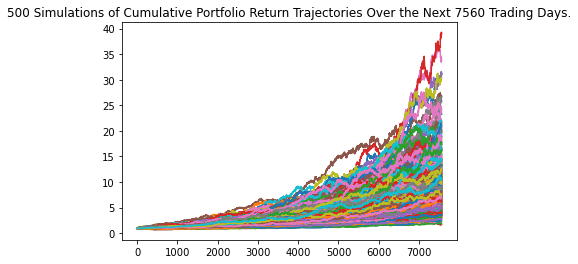

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_plot = MC_30year.plot_simulation()

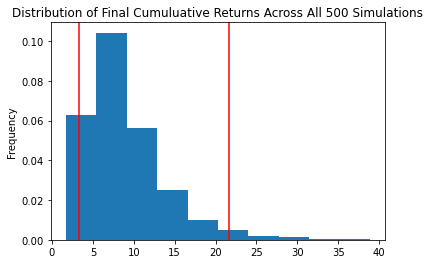

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_probd_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary30 = MC_30year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary30)

count           500.000000
mean              9.006012
std               5.038213
min               1.687429
25%               5.541071
50%               7.817831
75%              10.781012
max              38.912300
95% CI Lower      3.302817
95% CI Upper     21.675592
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(summary30[8]*20000,2)
ci_upper = round(summary30[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $66056.35 and $433511.85


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment1 = 20000 * 1.5
initial_investment1

30000.0

In [24]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE
ci_lower = round(summary30[8]*initial_investment1,2)
ci_upper = round(summary30[9]*initial_investment1,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment1} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")                

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $99084.52 and $650267.77


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.75,.25],
    num_simulation = 500,
    num_trading_days = 252*5)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998118,0.997748,1.001786,1.000542,1.000646,0.998318,0.999602,1.002771,1.001961,0.996075,...,1.005206,0.994153,1.002854,0.994068,1.005392,1.006453,0.998500,1.000569,1.001309,0.997247
2,1.003972,0.991136,0.997493,1.006213,0.998223,0.999906,1.003490,1.003565,1.004024,0.999023,...,1.003134,0.995847,0.999410,0.990909,1.000684,1.005619,0.999241,1.000284,1.000432,1.002286
3,1.003649,0.987964,0.997548,1.012850,0.998169,1.000742,1.002048,1.003829,0.998569,0.999313,...,1.006354,1.002212,1.002547,0.990299,0.997011,1.007065,0.995819,1.007326,1.007104,1.005737
4,1.002690,0.989059,1.007847,1.005921,0.998270,1.003482,1.002964,1.003954,1.000169,0.991732,...,1.012441,1.006900,1.007099,0.980178,0.998132,1.011114,0.993017,1.004667,1.002633,1.007067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.213703,1.444725,0.879048,1.571972,1.132881,1.468385,1.459211,1.209197,1.181730,1.131894,...,1.478545,1.576884,1.372559,1.411478,1.648493,1.479105,1.358294,1.260657,1.392342,1.878972
1257,1.222093,1.457586,0.878621,1.565755,1.123948,1.465299,1.470531,1.200988,1.176379,1.126795,...,1.466641,1.577996,1.375592,1.419873,1.665966,1.480681,1.357148,1.260189,1.379902,1.874968
1258,1.220534,1.458153,0.877266,1.563602,1.125448,1.460835,1.485428,1.194570,1.181025,1.125254,...,1.471954,1.580493,1.380354,1.423006,1.660353,1.487108,1.356699,1.268310,1.376595,1.893151
1259,1.215135,1.460003,0.880455,1.558905,1.127899,1.453949,1.473342,1.193882,1.181129,1.128155,...,1.477986,1.584338,1.376019,1.429147,1.659941,1.482941,1.356465,1.268076,1.371619,1.899281


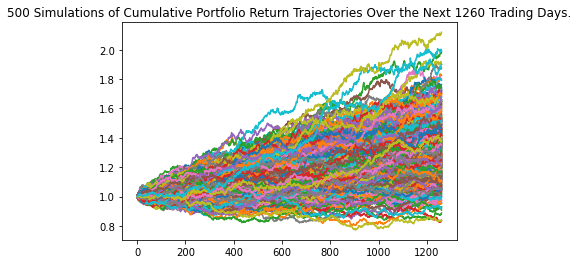

In [27]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_5year_line_plot = MC_5year.plot_simulation()

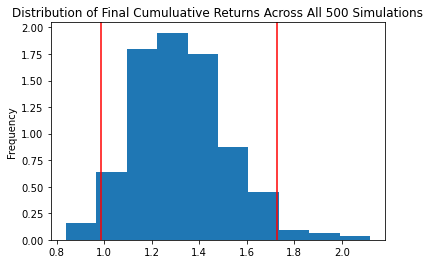

In [28]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_5year_dist_plot = MC_5year.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
M5_5year_tbl = MC_5year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(M5_5year_tbl)

count           500.000000
mean              1.320647
std               0.195109
min               0.837886
25%               1.176986
50%               1.310577
75%               1.441337
max               2.119400
95% CI Lower      0.986822
95% CI Upper      1.727786
Name: 1260, dtype: float64


In [30]:
# Set initial investment
# YOUR CODE HERE!
initial_investment2= 50000

In [31]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(M5_5year_tbl[8]*initial_investment2,2)
ci_upper_five = round(M5_5year_tbl[9]*initial_investment2,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $49341.1 and $86389.31


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10)


In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996692,0.999725,0.999694,0.988636,1.000139,1.002608,1.000070,1.002345,0.996229,1.010098,...,1.002476,0.992902,0.996641,1.005236,0.994683,1.000642,1.003357,0.992984,1.008780,0.995554
2,0.998432,1.000314,0.998873,0.981788,0.997916,1.010390,0.997920,1.004080,0.993166,1.011625,...,1.001223,0.997580,1.000221,1.006970,1.002617,1.001985,1.011983,0.987908,1.001068,1.009091
3,1.002325,1.005369,0.991975,0.973361,1.006249,1.018563,1.006765,0.999199,0.997427,1.014000,...,0.996300,0.990494,0.997293,1.011743,0.999812,0.995985,1.016007,0.995843,0.999038,1.002677
4,1.008276,1.007135,0.977643,0.972956,1.003499,1.021768,1.009597,0.990089,1.000065,1.020301,...,0.987544,0.989446,0.988441,1.015576,0.997475,1.005768,1.019743,0.992495,0.995504,0.995917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.217393,1.726026,2.623355,2.532639,1.497711,2.810464,2.216860,2.380994,1.251814,1.727084,...,2.044502,2.232426,1.840290,2.209955,1.635566,2.682266,1.951907,1.639718,2.414867,1.870273
2517,1.217012,1.730642,2.653061,2.543111,1.490436,2.822765,2.228906,2.382795,1.251866,1.726307,...,2.034322,2.202610,1.849921,2.222468,1.634180,2.689917,1.963174,1.629352,2.417670,1.884957
2518,1.220002,1.730084,2.642963,2.539652,1.491658,2.800821,2.230071,2.392433,1.260579,1.736169,...,2.014716,2.179899,1.843769,2.222051,1.625731,2.688822,1.949008,1.632055,2.435926,1.891160
2519,1.210539,1.724495,2.634714,2.542321,1.492185,2.810971,2.224108,2.417069,1.262771,1.738099,...,1.989131,2.159819,1.834629,2.234576,1.636791,2.695892,1.942017,1.626295,2.424684,1.890590


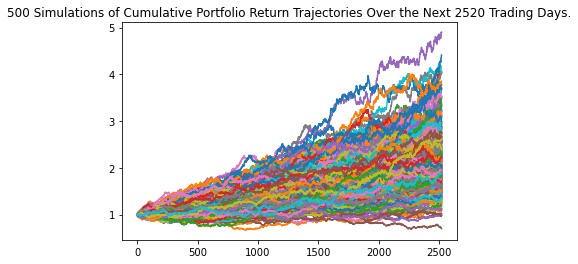

In [34]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_10year_line_plot = MC_10year.plot_simulation()


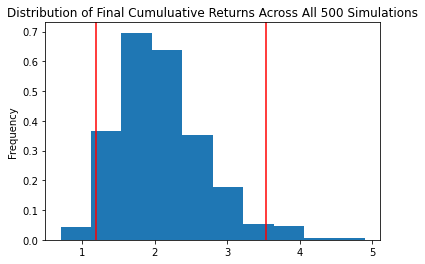

In [35]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_10year_dist_plot = MC_10year.plot_distribution()


In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
MC_10year_tbl = MC_10year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(MC_10year_tbl)

count           500.000000
mean              2.092327
std               0.607438
min               0.700169
25%               1.637639
50%               2.019223
75%               2.424896
max               4.895885
95% CI Lower      1.190351
95% CI Upper      3.531883
Name: 2520, dtype: float64


In [37]:
# Set initial investment
# YOUR CODE HERE!
initial_investment3= 50000

In [39]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(MC_10year_tbl[8]*initial_investment3,2)
ci_upper_ten = round(MC_10year_tbl[9]*initial_investment3,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment3} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $59517.57 and $176594.16
